# DESCRIPTION

The Beer production dataset provides a time series data for monthly beer production in Australia, for the period Jan 1956 – Aug 1995.
Objective:
• Check for the stationarity of your data using Rolling Statistics and Dickey-Fuller test.
• If stationarity is present, remove it using differencing in Python.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf

import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']= 15,6

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('monthly-beer-production-in-austr.csv')

In [3]:
data

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Month                                 476 non-null    object 
 1   Monthly beer production in Australia  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [5]:
data['Month'] = data['Month'].astype('string')
data['Month'] = data['Month'].str[:4]

In [6]:
data

,Month,Monthly beer production in Australia
0,1956,93.2
1,1956,96.0
2,1956,95.2
3,1956,77.1
4,1956,70.9
...,...,...
471,1995,127.0
472,1995,151.0
473,1995,130.0
474,1995,119.0


In [58]:
new_beer = data.groupby("Month")
new_df = new_beer.agg("sum")
new_df.head()

,Monthly beer production in Australia
Month,
1956,1032.5
1957,1046.4
1958,1055.1
1959,1052.4
1960,1084.4


In [60]:
index = pd.Index(range(0,40,1))
new_df.reset_index(drop=False, inplace = True)
new_df.head()

,Month,Monthly beer production in Australia
0,1956,1032.5
1,1957,1046.4
2,1958,1055.1
3,1959,1052.4
4,1960,1084.4


In [61]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Month                                 40 non-null     object 
 1   Monthly beer production in Australia  40 non-null     float64
dtypes: float64(1), object(1)
memory usage: 768.0+ bytes


In [62]:
new_df.head()

,Month,Monthly beer production in Australia
0,1956,1032.5
1,1957,1046.4
2,1958,1055.1
3,1959,1052.4
4,1960,1084.4


In [63]:
new_df.tail()

,Month,Monthly beer production in Australia
35,1991,1899.1
36,1992,1805.0
37,1993,1775.0
38,1994,1776.0
39,1995,1106.0


In [66]:
ts = new_df['Monthly beer production in Australia']
ts

0     1032.5
1     1046.4
2     1055.1
3     1052.4
4     1084.4
5     1123.7
6     1144.4
7     1189.4
8     1255.8
9     1310.6
10    1333.8
11    1398.6
12    1481.2
13    1522.0
14    1583.6
15    1645.0
16    1694.8
17    1837.7
18    1914.9
19    1940.2
20    1943.7
21    1960.7
22    1998.3
23    1948.2
24    1931.1
25    2030.9
26    1980.7
27    1849.6
28    1851.1
29    1857.1
30    1849.6
31    1876.6
32    1958.0
33    1922.5
34    1958.5
35    1899.1
36    1805.0
37    1775.0
38    1776.0
39    1106.0
Name: Monthly beer production in Australia, dtype: float64

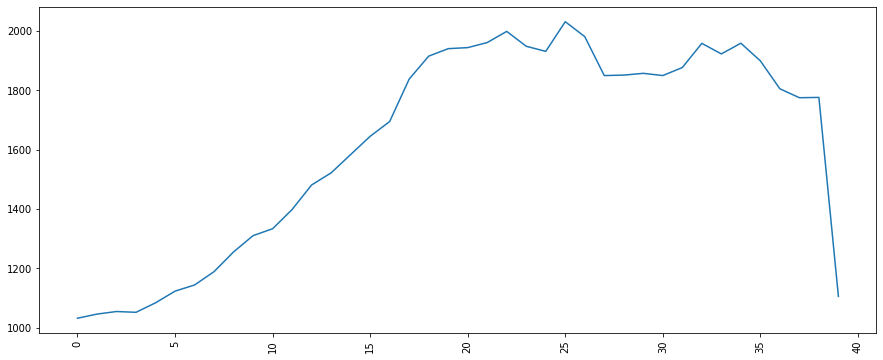

In [67]:
plt.xticks(rotation = 'vertical')
plt.plot(new_df.index,ts)
plt.show()

It is clear from the plot that there is a overall increase in the trend till year 1991 and then it is decreasing and falling drastically by year 1995. Seasonality can also be observed in the above data. So we can conclude that the Time Series has non stationarity.

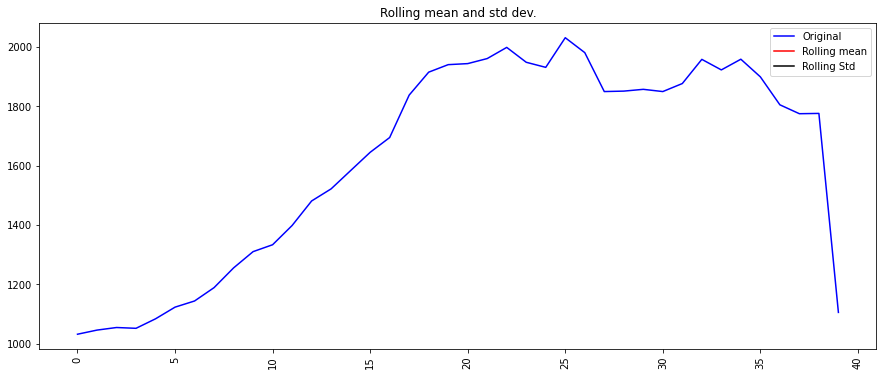

Results of Dickey-Fuller Test : 
Test Statistic                 -0.660823
p-value                         0.856638
#Lags Used                      8.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [68]:
# rolling statistics
def adf_test(timeseries) :
    rolmean = timeseries.rolling(window =52, center = False).mean()
    rolstd = timeseries.rolling(window = 52, center = False).std()
    #print(rolmean)
    #print(rolstd)
    orig = plt.plot(timeseries, color = "blue", label = 'Original')
    mean = plt.plot(rolmean,color = 'red', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.xticks(rotation = 'vertical')
    plt.legend(loc = 'best')
    plt.title("Rolling mean and std dev.")
    plt.show()          
    
    print('Results of Dickey-Fuller Test : ')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value','#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items() :
        dfoutput['Critical Value (%s) '%key] = value
    print(dfoutput)
adf_test(new_df['Monthly beer production in Australia'])
    
    

In [76]:
# create a differenced series
def difference(dataset,ms,me) :
    diff = list()
    s = ms
    n = me
    print(n)
    for i in range(1, n, 1):
        mvalue = dataset[i] - dataset[i-1]
        diff.append(mvalue)
    return(diff)

#invert differenced forecast
def inverse_difference(last_ob, value) :
    return value * last_ob

data = ts
s = data.index[0]
e = s+40
print(s)
print(e)
diff = difference(data,s,e)
print(diff)

inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]
print(inverted)
            



0
40
40
[13.900000000000091, 8.699999999999818, -2.699999999999818, 32.0, 39.299999999999955, 20.700000000000045, 44.99999999999977, 66.40000000000032, 54.799999999999955, 23.200000000000045, 64.79999999999995, 82.59999999999991, 40.799999999999955, 61.600000000000136, 61.40000000000009, 49.79999999999973, 142.9000000000001, 77.20000000000005, 25.300000000000182, 3.4999999999997726, 16.999999999999773, 37.600000000000136, -50.09999999999991, -17.100000000000136, 99.80000000000041, -50.200000000000045, -131.10000000000036, 1.5, 6.000000000000227, -7.500000000000227, 27.0, 81.39999999999986, -35.499999999999545, 35.999999999999545, -59.399999999999864, -94.09999999999991, -30.0, 1.0, -670.0]
[14351.750000000095, 9103.679999999811, -2848.7699999998076, 33676.8, 42616.919999999955, 23260.59000000005, 51497.999999999745, 78976.16000000037, 68817.83999999995, 30405.920000000064, 86430.23999999995, 115524.35999999988, 60432.959999999934, 93755.2000000002, 97233.04000000015, 81920.99999999956,

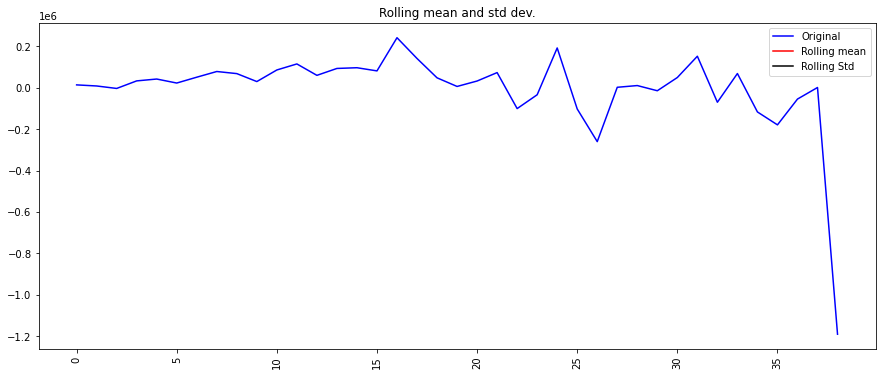

Results of Dickey-Fuller Test : 
Test Statistic                  0.471933
p-value                         0.983995
#Lags Used                      7.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [79]:
def adf_test(timeseries) :
    rolmean = timeseries.rolling(window =52, center = False).mean()
    rolstd = timeseries.rolling(window = 52, center = False).std()
    #print(rolmean)
    #print(rolstd)
    orig = plt.plot(timeseries, color = "blue", label = 'Original')
    mean = plt.plot(rolmean,color = 'red', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.xticks(rotation = 'vertical')
    plt.legend(loc = 'best')
    plt.title("Rolling mean and std dev.")
    plt.show()          
    
    print('Results of Dickey-Fuller Test : ')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value','#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items() :
        dfoutput['Critical Value (%s) '%key] = value
    print(dfoutput)
beer_new_df = pd.Series(inverted)
adf_test(beer_new_df)
 

In [ ]:
non Stationarity removed using differencing